# 📓 Chapter 9 Notebook  
## Optics and Imaging  
### *Refraction, Lenses, and Image Formation*

Optics can be confusing because it mixes geometry and intuition.  
This notebook uses **pictures first** (ray diagrams), and then introduces equations.
Optional interactive cells are **pre-filled**.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Use **Snell’s Law** to predict refraction angles
- Understand **critical angle** and total internal reflection (TIR)
- Build a simple **ray-tracing** model for a thin lens
- Explore how focal length and object distance affect image distance and magnification
- Connect lens behavior to **microscopy** intuition
- Estimate **diffraction-limited resolution** with a simple model


---
## ✅ Setup (run once)

If you see missing package errors, run the install cell once and restart the kernel.


In [ ]:
%pip install matplotlib numpy ipywidgets

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## 🌈 Part 1 — Refraction with Snell’s Law

When light crosses an interface between two media (with refractive indices $n_1$ and $n_2$), it bends:

$$
n_1 \sin(\theta_1) = n_2 \sin(\theta_2)
$$

Angles are measured from the **normal** (a line perpendicular to the surface).


In [2]:
# Snell's Law calculator
import math

n1 = 1.00      # medium 1 (air)
n2 = 1.33      # medium 2 (water)
theta1_deg = 40

theta1 = math.radians(theta1_deg)
sin_theta2 = (n1/n2) * math.sin(theta1)

# Guard against numerical issues
if abs(sin_theta2) <= 1:
    theta2 = math.asin(sin_theta2)
    theta2_deg = math.degrees(theta2)
else:
    theta2_deg = None

theta2_deg

28.90108453970811

### Try this
- Change `theta1_deg`  
- Change `n2` to 1.5 (glass)  
How does bending depend on refractive index?

Next we’ll draw a **ray diagram** to make this visual.


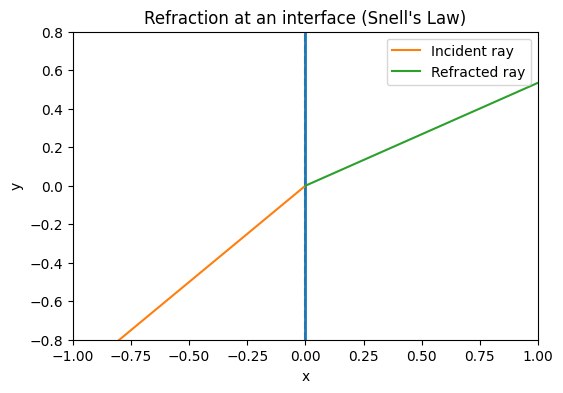

In [3]:
# Ray diagram for refraction (2D top-down view)
import math
n1 = 1.0
n2 = 1.5
theta1_deg = 45
theta1 = math.radians(theta1_deg)

sin_theta2 = (n1/n2)*math.sin(theta1)
theta2 = math.asin(sin_theta2)

# Build rays
L = 1.0
x1 = np.linspace(-L, 0, 100)  # incident side
y1 = np.tan(theta1) * (x1)    # incident ray (approaching interface at x=0)

x2 = np.linspace(0, L, 100)   # transmitted side
y2 = np.tan(theta2) * (x2)    # refracted ray

plt.figure(figsize=(6,4))
# interface
plt.axvline(0, linewidth=2)
# normal
plt.plot([0,0], [-0.8,0.8], linestyle='--')
# rays
plt.plot(x1, y1, label="Incident ray")
plt.plot(x2, y2, label="Refracted ray")

plt.xlim(-1,1)
plt.ylim(-0.8,0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Refraction at an interface (Snell's Law)")
plt.legend()
plt.show()

---
## 🔥 Part 2 — Critical Angle and Total Internal Reflection (TIR)

If light goes from **higher** refractive index to **lower** (e.g., glass → air), there is a **critical angle**:

$$
\theta_c = \sin^{-1}\left(\frac{n_2}{n_1}\right)\quad \text{(only if }n_1>n_2\text{)}
$$

For $\theta_1 > \theta_c$, refraction is impossible and light reflects back: **total internal reflection**.


In [4]:
import math
n1 = 1.50   # glass
n2 = 1.00   # air

theta_c = math.degrees(math.asin(n2/n1))
theta_c

41.810314895778596

This is why fiber optics work: light stays trapped inside a higher-index core.


---
## 🔍 Part 3 — Thin Lens Equation (Image Formation)

A thin lens is often modeled using:

$$
\frac{1}{f} = \frac{1}{d_o} + \frac{1}{d_i}
$$

Where:
- $f$: focal length  
- $d_o$: object distance  
- $d_i$: image distance  

Magnification:
$$
m = -\frac{d_i}{d_o}
$$


In [5]:
# Thin lens calculator
f = 0.050     # m (50 mm lens)
do = 0.200    # m (object distance)

di = 1 / (1/f - 1/do)
m = -di/do

di, m

(0.06666666666666667, -0.3333333333333333)

### Try this
Move the object closer to the lens (decrease `do`).  
What happens near `do = f`?


---
## 📐 Part 4 — Ray Diagram for a Thin Lens (Simple Ray Tracing)

We will trace three common rays:
1. A ray parallel to the axis → refracts through the focal point  
2. A ray through the focal point → exits parallel  
3. A ray through the center of the lens → goes straight  

The intersection gives the image location.


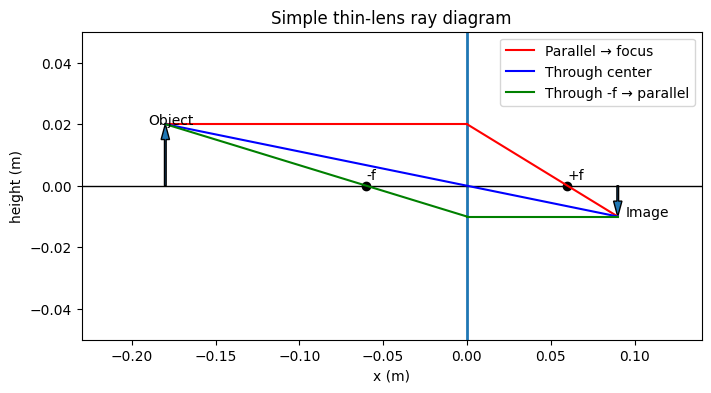

(0.08999999999999998, -0.009999999999999998)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (meters)
f = 0.06
do = 0.18
ho = 0.02  # object height

# Compute image distance and height
di = 1 / (1/f - 1/do)
hi = -di/do * ho

# Coordinate system: lens at x=0, object at x=-do, image at x=+di
x_obj = -do
x_img = di

# Build plot
plt.figure(figsize=(8,4))
plt.axvline(0, linewidth=2)  # lens
plt.axhline(0, color='k', linewidth=1)  # optical axis

# Mark focal points
plt.plot([f, -f], [0, 0], 'ko')
plt.text(f, 0.002, "+f")
plt.text(-f, 0.002, "-f")

# Draw object and image arrows
plt.arrow(x_obj, 0, 0, ho, head_width=0.005, head_length=0.005, length_includes_head=True)
plt.text(x_obj-0.01, ho, "Object")
plt.arrow(x_img, 0, 0, hi, head_width=0.005, head_length=0.005, length_includes_head=True)
plt.text(x_img+0.005, hi, "Image")

# Rays from top of object
# Ray 1: parallel to axis -> through +f
x1 = np.linspace(x_obj, 0, 50)
y1 = np.full_like(x1, ho)
# after lens line passes through (f,0)
x1b = np.linspace(0, x_img, 50)
y1b = ho + (0-ho)*(x1b-0)/(f-0)

# Ray 2: through center (straight)
x2 = np.linspace(x_obj, x_img, 100)
y2 = ho + (hi-ho)*(x2-x_obj)/(x_img-x_obj)

# Ray 3: through -f to lens, then parallel
# pre-lens line from object top to (-f,0)
x3 = np.linspace(x_obj, 0, 50)
y3 = ho + (0-ho)*(x3-x_obj)/((-f)-x_obj)
# post-lens parallel
x3b = np.linspace(0, x_img, 50)
y3b = y3[-1] * np.ones_like(x3b)

# Plot rays
plt.plot(x1, y1, 'r')
plt.plot(x1b, y1b, 'r', label="Parallel → focus")
plt.plot(x2, y2, 'b', label="Through center")
plt.plot(x3, y3, 'g')
plt.plot(x3b, y3b, 'g', label="Through -f → parallel")

plt.xlim(x_obj-0.05, x_img+0.05)
plt.ylim(-0.05, 0.05)
plt.xlabel("x (m)")
plt.ylabel("height (m)")
plt.title("Simple thin-lens ray diagram")
plt.legend(loc="upper right")
plt.show()

di, hi

### Try this
Change `f` or `do`.  
- Shorter focal length lenses are “stronger” (more bending)  
- Microscopes use short focal lengths to create large magnification.


---
## 🔬 Part 5 — Microscopy Intuition: Focal Length and Magnification

A very rough microscopy idea:
- Short $f$ allows a lens to form an image with larger magnification for a nearby object.
- High refractive index materials and curved surfaces help achieve short effective focal lengths.

We won’t derive lensmaker’s equation in detail here, but we can still explore:
- What happens when $f$ decreases?
- What object distances are practical?


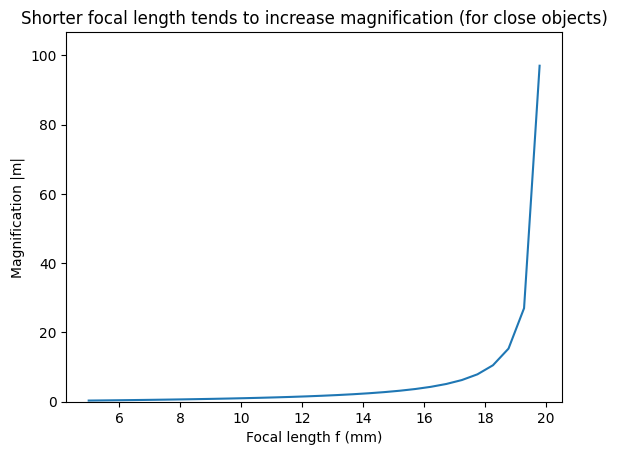

In [7]:
# Sweep focal length and compute magnification for a fixed object distance
do = 0.020  # 2 cm from lens (close)
f_values = np.linspace(0.005, 0.030, 50)  # 5–30 mm
m_values = []

for f in f_values:
    if do > f:
        di = 1 / (1/f - 1/do)
        m = -di/do
    else:
        m = np.nan
    m_values.append(abs(m))

plt.plot(f_values*1000, m_values)
plt.xlabel("Focal length f (mm)")
plt.ylabel("Magnification |m|")
plt.title("Shorter focal length tends to increase magnification (for close objects)")
plt.ylim(0, np.nanmax(m_values)*1.1)
plt.show()

---
## 🧠 Part 6 — Resolution (Diffraction Limit) and Contrast (Simple Models)

### Diffraction-limited resolution (Rayleigh criterion, microscopy)
A common approximation:
$$
d \approx 0.61 \frac{\lambda}{NA}
$$
Where:
- $d$: smallest resolvable distance  
- $\lambda$: wavelength (m)  
- $NA$: numerical aperture  

### Contrast (very simple)
Contrast can be described in many ways; one common definition is Michelson contrast:
$$
C = \frac{I_{max}-I_{min}}{I_{max}+I_{min}}
$$


In [8]:
# Resolution calculator
lam_nm = 550      # nm (green light)
NA = 0.8

d = 0.61 * (lam_nm*1e-9) / NA
d_um = d * 1e6
d_um

0.419375

### Try this
- Increase NA (better optics)  
- Decrease wavelength (bluer light)  
How does resolution change?


In [9]:
# Contrast calculator (Michelson)
I_max = 1.0
I_min = 0.6

C = (I_max - I_min) / (I_max + I_min)
C

0.25

### Try this
Lower `I_min` (darker background). What happens to contrast?


---
## ⭐ Optional: Interactive sliders (pre-filled)

Use sliders to explore:
- Snell refraction angle vs refractive index  
- Lens imaging vs focal length and object distance  
- Diffraction-limited resolution vs wavelength and NA

If sliders don’t work in your environment, you can skip this section.


In [10]:
import math
try:
    from ipywidgets import interact, FloatSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def snell_demo(n1=1.0, n2=1.5, theta1_deg=40):
    th1 = math.radians(theta1_deg)
    s2 = (n1/n2)*math.sin(th1)
    if abs(s2) <= 1:
        th2 = math.degrees(math.asin(s2))
        return f"theta2 ≈ {th2:.1f}°"
    else:
        return "Total internal reflection (no real theta2)"

def lens_demo(f_mm=60, do_mm=180):
    f = f_mm/1000
    do = do_mm/1000
    if do == f:
        return "do = f → image at infinity (collimated rays)"
    if do < f:
        return "do < f → virtual image (not covered here)"
    di = 1/(1/f - 1/do)
    m = -di/do
    return f"di ≈ {di*1000:.1f} mm, magnification m ≈ {m:.2f}"

def resolution_demo(lam_nm=550, NA=0.8):
    d = 0.61*(lam_nm*1e-9)/NA
    return f"Resolution d ≈ {d*1e6:.2f} µm"

try:
    interact(snell_demo,
             n1=FloatSlider(min=1.0, max=2.0, step=0.01, value=1.0, description="n1"),
             n2=FloatSlider(min=1.0, max=2.0, step=0.01, value=1.5, description="n2"),
             theta1_deg=FloatSlider(min=0, max=89, step=1, value=40, description="θ1 (deg)"))
    interact(lens_demo,
             f_mm=FloatSlider(min=5, max=200, step=1, value=60, description="f (mm)"),
             do_mm=FloatSlider(min=10, max=400, step=5, value=180, description="do (mm)"))
    interact(resolution_demo,
             lam_nm=FloatSlider(min=350, max=750, step=10, value=550, description="λ (nm)"),
             NA=FloatSlider(min=0.1, max=1.4, step=0.05, value=0.8, description="NA"))
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(FloatSlider(value=1.0, description='n1', max=2.0, min=1.0, step=0.01), FloatSlider(value…

interactive(children=(FloatSlider(value=60.0, description='f (mm)', max=200.0, min=5.0, step=1.0), FloatSlider…

interactive(children=(FloatSlider(value=550.0, description='λ (nm)', max=750.0, min=350.0, step=10.0), FloatSl…

---
## 🟣 Point Spread Function (PSF) Demo — Why Resolution Has a Limit

Even a perfect lens does not image a point as a perfect point.
Because light behaves like a wave, a point source becomes a **blur pattern** called a **Point Spread Function (PSF)**.

In many microscopy contexts, a useful simplified PSF model is a **Gaussian blur**.
- Smaller blur width → sharper image
- Larger blur width → more overlap between nearby features (harder to distinguish)

Below we will:
1. Create two “point objects” separated by some distance
2. Blur them with a PSF
3. See whether they appear as **two peaks** or one merged blob

This connects directly to the diffraction-limited resolution idea.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

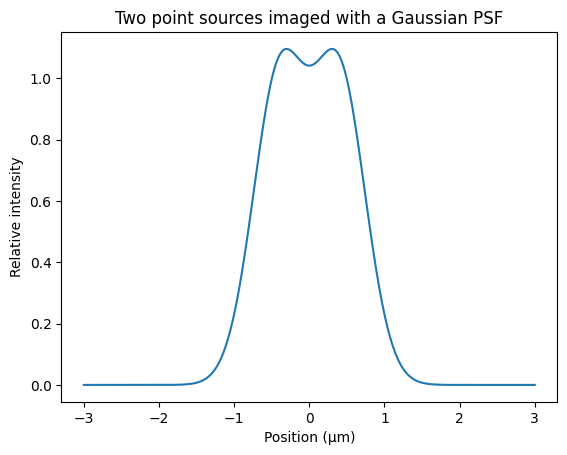

In [11]:
# --- PSF / imaging parameters you can change ---
separation_um = 0.8    # distance between two points (micrometers)
sigma_um = 0.35        # PSF blur width (micrometers)  (smaller = sharper)
A1, A2 = 1.0, 1.0      # brightness of the two points

# Axis in micrometers
x = np.linspace(-3, 3, 800)

# Two "point objects" (as delta-like spikes)
x1 = -separation_um/2
x2 =  separation_um/2

# Gaussian PSF model
def psf(x, x0, sigma):
    return np.exp(-0.5*((x-x0)/sigma)**2)

image = A1*psf(x, x1, sigma_um) + A2*psf(x, x2, sigma_um)

plt.plot(x, image)
plt.xlabel("Position (µm)")
plt.ylabel("Relative intensity")
plt.title("Two point sources imaged with a Gaussian PSF")
plt.show()

### Try this
- Decrease `separation_um` until the two peaks merge into one.  
- Increase `sigma_um` (worse optics / lower NA / longer wavelength) and see how quickly merging happens.

**Interpretation:** When the PSF is wide compared to the object spacing, features overlap and become indistinguishable.


---
## ⭐ Optional: PSF Resolution Explorer (Pre-filled)

This cell creates a heatmap showing how “resolvability” changes with:
- point separation (µm)
- PSF width (µm)

You can run it as-is.


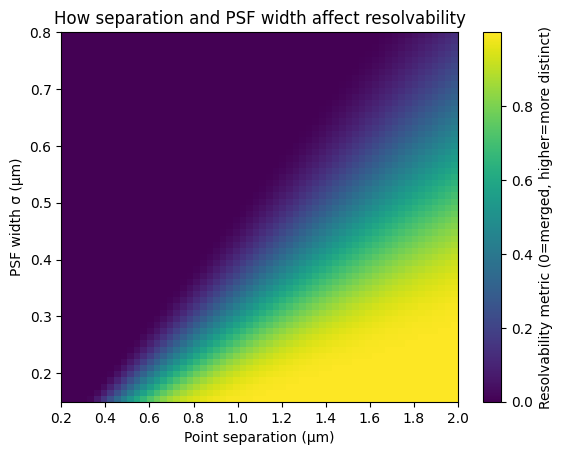

In [12]:
# Optional advanced: heatmap of peak separation visibility
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1200)

def psf(x, x0, sigma):
    return np.exp(-0.5*((x-x0)/sigma)**2)

def two_peak_metric(sep, sigma):
    # simple heuristic: dip depth between peaks
    x1, x2 = -sep/2, sep/2
    img = psf(x, x1, sigma) + psf(x, x2, sigma)
    peak = img.max()
    mid = img[np.argmin(np.abs(x-0.0))]
    # larger (peak-mid) suggests two distinct peaks
    return (peak - mid) / peak

seps = np.linspace(0.2, 2.0, 60)
sigmas = np.linspace(0.15, 0.80, 60)

M = np.zeros((len(sigmas), len(seps)))
for i, s in enumerate(sigmas):
    for j, sep in enumerate(seps):
        M[i, j] = two_peak_metric(sep, s)

plt.imshow(M, aspect='auto', origin='lower',
           extent=[seps.min(), seps.max(), sigmas.min(), sigmas.max()],
           cmap='viridis')
plt.colorbar(label="Resolvability metric (0=merged, higher=more distinct)")
plt.xlabel("Point separation (µm)")
plt.ylabel("PSF width σ (µm)")
plt.title("How separation and PSF width affect resolvability")
plt.show()

**Reading the heatmap:**  
- Moving right (larger separation) makes two points easier to resolve.  
- Moving up (larger PSF width) makes resolution worse.  
This is the same tradeoff captured by diffraction-limited resolution formulas.


---
## 🧠 Big Picture Takeaways

- Refraction is governed by **Snell’s Law**: $n_1\sin	\theta_1=n_2\sin	\theta_2$  
- Total internal reflection occurs above a **critical angle** when going from high-to-low index  
- Lenses form images according to the **thin lens equation**  
- Ray diagrams are a visual tool for predicting image location and magnification  
- Microscopy benefits from short focal lengths and high NA  
- Resolution is fundamentally limited by **diffraction**: $d \sim 0.61\lambda/NA$  
- Contrast depends on the separation of intensities (e.g., Michelson contrast)

Next: Chapter 10 (often electromagnetic spectrum / lasers / imaging modalities) depending on your course sequence.
